<ipython-input-15-6f248c61f0cc>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='c',LineWidth=1.5,label='Original(ruido)')
<ipython-input-15-6f248c61f0cc>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k',LineWidth=2,label='Limpio')


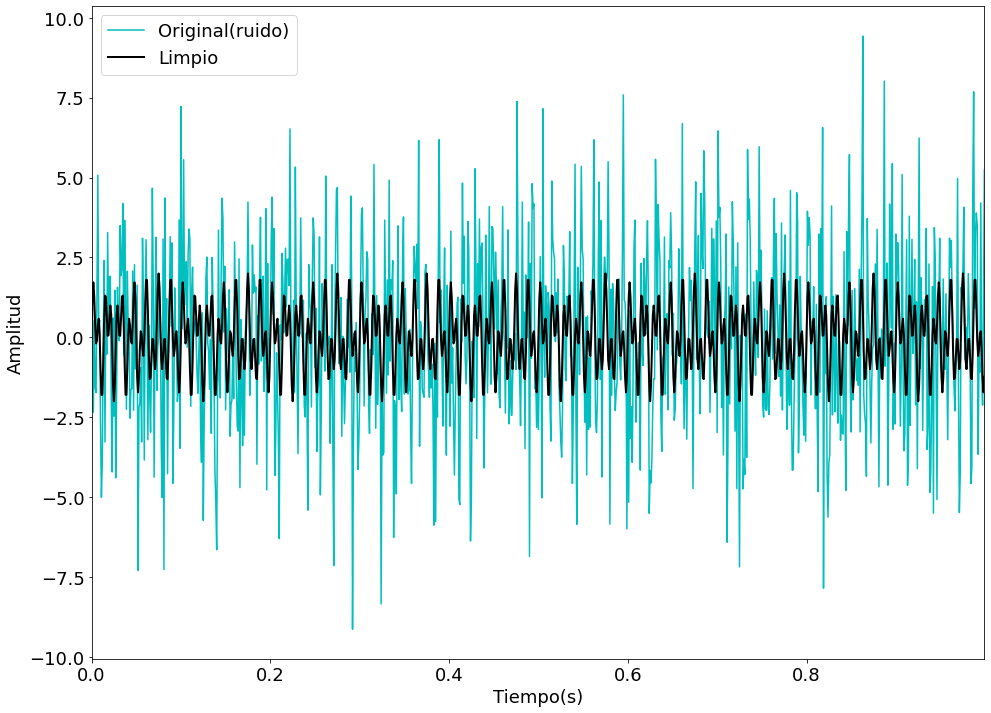

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

#Create a signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*70*t) + np.sin(2*np.pi*150*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

plt.plot(t,f,color='c',LineWidth=1.5,label='Original(ruido)')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Limpio')
plt.xlim(t[0],t[-1])
plt.legend()
plt.xlabel('Tiempo(s)')
plt.ylabel('Amplitud')
plt.show()


<ipython-input-21-3bcef8d2d826>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='c',LineWidth=1.5,label='Original(ruido)')
<ipython-input-21-3bcef8d2d826>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k',LineWidth=2,label='Limpia')
<ipython-input-21-3bcef8d2d826>:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Original(ruido)')
C:\Users\SE79065\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


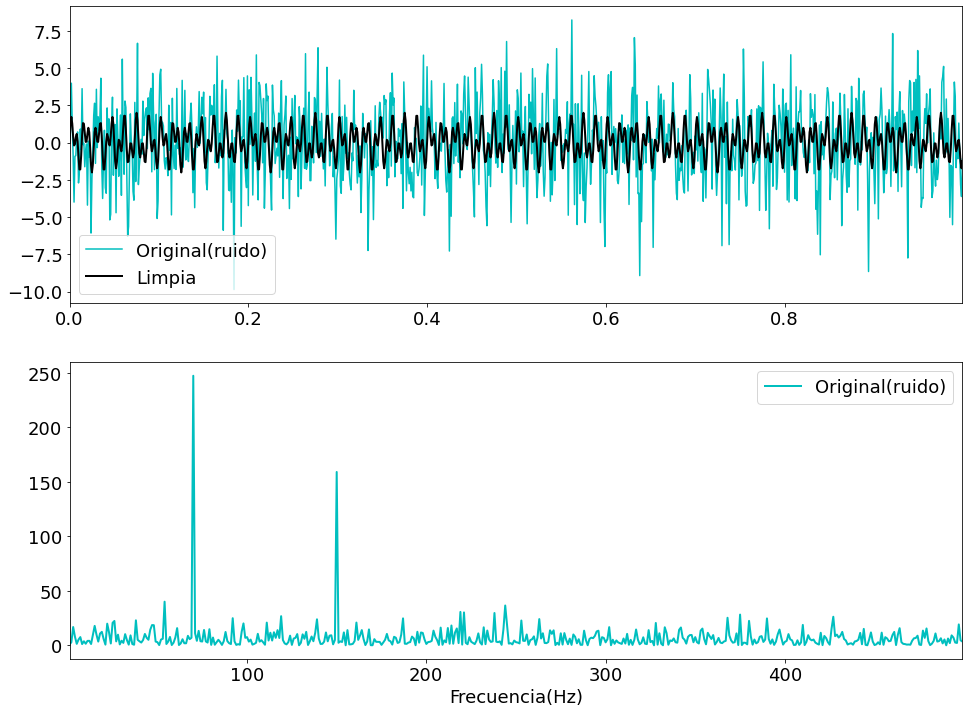

In [21]:
#Compute the FFT

n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat)/n
freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Original(ruido)')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Limpia')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Original(ruido)')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.xlabel('Frecuencia(Hz)')
plt.show()

In [22]:
#Denoise the signal
indices = PSD > 140
PSDClean = PSD*indices
fhat = indices*fhat
ffilt = np.fft.ifft(fhat)

<ipython-input-25-600fc58a7ee5>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='c',LineWidth=1.5,label='Original(ruido)')
<ipython-input-25-600fc58a7ee5>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k',LineWidth=2,label='Limpia')
<ipython-input-25-600fc58a7ee5>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,ffilt,color='k',LineWidth=2,label='Filtrada')
C:\Users\SE79065\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-25-600fc58a7ee5>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 

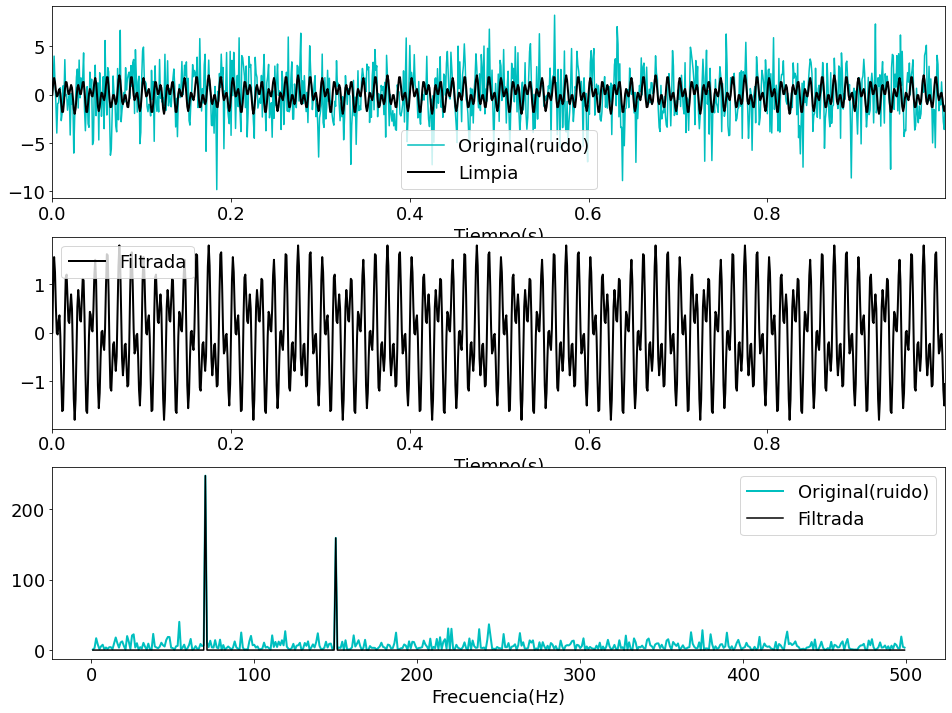

In [25]:
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Original(ruido)')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Limpia')
plt.xlim(t[0],t[-1])
plt.legend()
plt.xlabel('Tiempo(s)')

plt.sca(axs[1])
plt.plot(t,ffilt,color='k',LineWidth=2,label='Filtrada')
plt.xlim(t[0],t[-1])
plt.legend()
plt.xlabel('Tiempo(s)')

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Original(ruido)')
plt.plot(freq[L],PSDClean[L],color='k',LineWidth=1.5,label='Filtrada')
plt.legend()
plt.xlabel('Frecuencia(Hz)')

plt.show()